In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
# Seed for reproducibility
np.random.seed(42)
num_samples = 100

# Generate random data for each variable
humidity = np.random.uniform(30, 70, num_samples)  # in percentage
oven_temp = np.random.uniform(150, 250, num_samples)  # in Celsius
mixing_time = np.random.uniform(10, 60, num_samples)  # in minutes
ingredient_quality = np.random.uniform(0, 1, num_samples)  # quality score (0 to 1)
batch_size = np.random.uniform(500, 1500, num_samples)  # in kg
worker_experience = np.random.uniform(1, 10, num_samples)  # in years
machine_efficiency = np.random.uniform(0.8, 1, num_samples)  # efficiency ratio (0.8 to 1)
ingredient_cost = np.random.uniform(50, 200, num_samples)  # cost in dollars
downtime = np.random.uniform(0, 5, num_samples)  # downtime in hours
ambient_temperature = np.random.uniform(15, 35, num_samples)  # in Celsius

# Define weights for each variable indicating their impact on production
gen_weights = {
    "humidity": -0.5,
    "oven_temp": 1.2,
    "mixing_time": 0.8,
    "ingredient_quality": 2.5,
    "batch_size": 0.05,
    "worker_experience": 1.0,
    "machine_efficiency": 3.0,
    "ingredient_cost": -0.01,
    "downtime": -2.0,
    "ambient_temperature": 0.3
}

# Compute the production output
production_output = (
        gen_weights["humidity"] * humidity +
        gen_weights["oven_temp"] * oven_temp +
        gen_weights["mixing_time"] * mixing_time +
        gen_weights["ingredient_quality"] * ingredient_quality +
        gen_weights["batch_size"] * batch_size +
        gen_weights["worker_experience"] * worker_experience +
        gen_weights["machine_efficiency"] * machine_efficiency +
        gen_weights["ingredient_cost"] * ingredient_cost +
        gen_weights["downtime"] * downtime +
        gen_weights["ambient_temperature"] * ambient_temperature +
        np.random.normal(0, 5, num_samples)  # adding some noise
)

# Create a DataFrame
data = {
    "Humidity": humidity,
    "Oven Temperature": oven_temp,
    "Mixing Time": mixing_time,
    "Ingredient Quality": ingredient_quality,
    "Batch Size": batch_size,
    "Worker Experience": worker_experience,
    "Machine Efficiency": machine_efficiency,
    "Ingredient Cost": ingredient_cost,
    "Downtime": downtime,
    "Ambient Temperature": ambient_temperature,
    "Production Output": production_output
}

df = pd.DataFrame(data)
df.head()

,Humidity,Oven Temperature,Mixing Time,Ingredient Quality,Batch Size,Worker Experience,Machine Efficiency,Ingredient Cost,Downtime,Ambient Temperature,Production Output
0,44.981605,153.142919,42.101582,0.051682,603.123869,7.283455,0.833787,129.888415,3.536193,19.157725,233.296732
1,68.028572,213.641041,14.206998,0.531355,1402.552907,5.824867,0.855718,57.773531,0.762695,15.530644,309.447961
2,59.279758,181.435598,18.081436,0.540635,1005.252372,3.785749,0.835402,100.490642,2.881442,18.628709,261.175961
3,53.946339,200.857069,54.927709,0.637430,1326.457466,8.324155,0.817741,70.162202,3.033575,26.660831,340.973711
4,36.240746,240.756647,40.321453,0.726091,820.049601,7.162581,0.824127,59.506246,2.120653,23.428491,360.488567


In [69]:
df.describe()

,Humidity,Oven Temperature,Mixing Time,Ingredient Quality,Batch Size,Worker Experience,Machine Efficiency,Ingredient Cost,Downtime,Ambient Temperature,Production Output
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,48.807230,199.783172,35.880067,0.491149,1016.045823,5.727698,0.886317,128.893378,2.278623,24.423808,306.499907
std,11.899576,29.311125,14.671312,0.293452,318.600897,2.674099,0.053469,42.509056,1.466081,5.569753,38.659515
min,30.220885,150.695213,10.253079,0.014393,510.837651,1.130902,0.804014,52.716528,0.023160,15.219917,210.914302
25%,37.728030,174.200453,23.843993,0.249615,763.934847,3.299683,0.840302,93.454035,0.942489,20.100325,278.845188
50%,48.565698,200.562486,38.127747,0.509718,1025.399477,5.753818,0.877514,131.470798,2.162234,24.220562,303.108464
75%,59.208125,226.618360,47.618347,0.735778,1296.884175,8.300262,0.922506,168.493131,3.403646,28.799518,333.373610
max,69.475477,248.565045,59.502693,0.990505,1492.964796,9.997459,0.997303,198.494035,4.984371,34.688044,393.122058


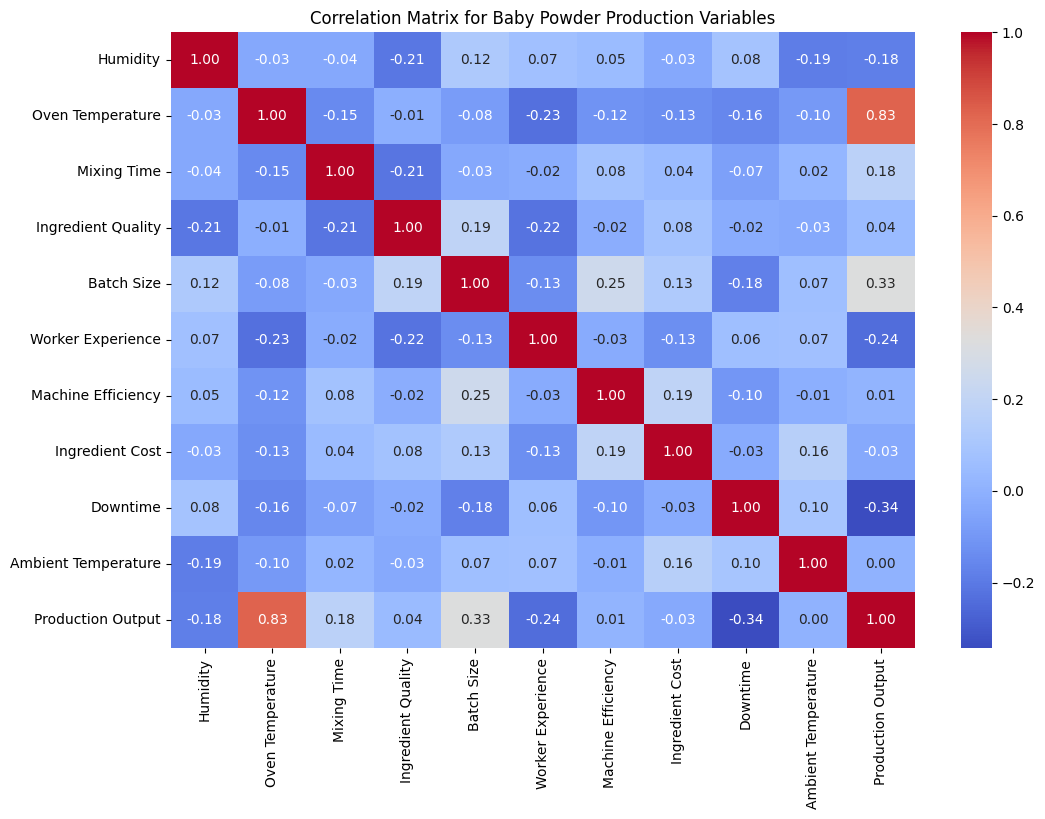

In [70]:
# Generate correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Baby Powder Production Variables')
plt.show()

In [71]:
# Separate features and target variable
X = df.drop(columns="Production Output")
y = df["Production Output"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients (weights)
weights = model.coef_
intercept = model.intercept_

# Create a DataFrame for better readability
weight_df = pd.DataFrame({
    "Variable": X.columns,
    "Weight": weights
})

print("Intercept:", intercept)
# print([f'{x:.2f}' for x in weights])
# print(gen_weights.values())
weight_df

Intercept: 31.938735934142358


,Variable,Weight
0,Humidity,-0.588314
1,Oven Temperature,1.172813
2,Mixing Time,0.816854
3,Ingredient Quality,1.316518
4,Batch Size,0.050795
5,Worker Experience,0.585006
6,Machine Efficiency,-19.684146
7,Ingredient Cost,0.017235
8,Downtime,-2.413626
9,Ambient Temperature,0.181308


In [72]:
gen_weights

{'humidity': -0.5,
 'oven_temp': 1.2,
 'mixing_time': 0.8,
 'ingredient_quality': 2.5,
 'batch_size': 0.05,
 'worker_experience': 1.0,
 'machine_efficiency': 3.0,
 'ingredient_cost': -0.01,
 'downtime': -2.0,
 'ambient_temperature': 0.3}

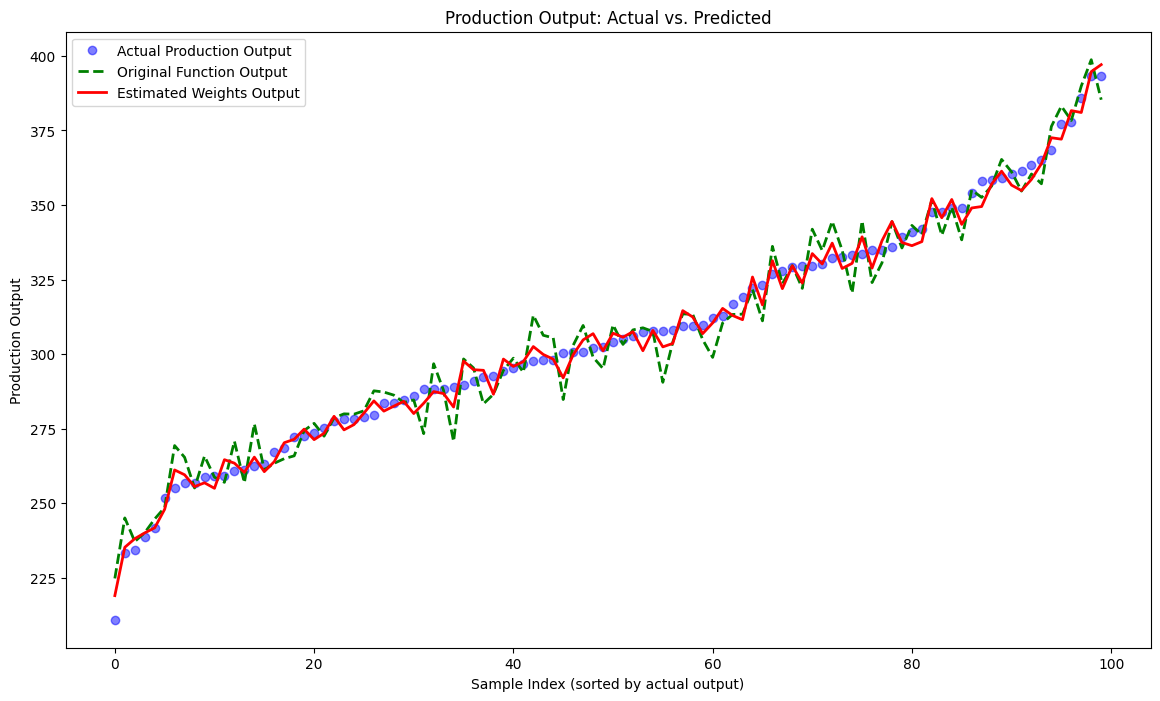

In [73]:
# Convert weights to a numpy array for easy multiplication
original_weights_array = np.array(list(gen_weights.values()))

# Predicted production output using original weights
y_pred_original = X.dot(original_weights_array) + np.random.normal(0, 5, len(X))

# Predict using the estimated weights
y_pred_estimated = model.predict(X)
# Sort the data by the actual production output
sorted_indices = y.argsort()
y_sorted = y.iloc[sorted_indices]
y_pred_original_sorted = y_pred_original[sorted_indices]
y_pred_estimated_sorted = y_pred_estimated[sorted_indices]

# Plotting
plt.figure(figsize=(14, 8))

# Plot the actual production output
plt.plot(range(len(y)), y_sorted, color='blue', linestyle='', marker='o', alpha=0.5, label='Actual Production Output')

# Plot the output from the original function
plt.plot(range(len(y)), y_pred_original_sorted, color='green', linestyle='--', linewidth=2,
         label='Original Function Output')

# Plot the output from the estimated weights
plt.plot(range(len(y)), y_pred_estimated_sorted, color='red', linestyle='-', linewidth=2,
         label='Estimated Weights Output')

plt.xlabel('Sample Index (sorted by actual output)')
plt.ylabel('Production Output')
plt.title('Production Output: Actual vs. Predicted')
plt.legend()
plt.show()


In [76]:
# Define the original function
def original_function(x):
    weights = np.array([-0.5, 1.2, 0.8, 2.5, 0.05, 1.0, 3.0, -0.01, -2.0, 0.3])
    return -np.dot(weights, x)  # Negative for maximization


# Define the estimated function using the estimated weights from the trained model
def estimated_function(x, model):
    x_df = pd.DataFrame([x], columns=model.feature_names_in_)
    return -model.predict(x_df)[0]  # Negative for maximization


# Define the constraints and bounds
constraints = []
# Compute bounds based on the range of each feature in the dataset
bounds = [(X[col].min(), X[col].max()) for col in X.columns]

# Initial guess
initial_guess = np.array([50, 200, 35, 0.5, 1000, 5, 0.9, 125, 2.5, 25])

# Find the optimal inputs for the original function
result_original = minimize(original_function, initial_guess, bounds=bounds, constraints=constraints)
optimal_inputs_original = result_original.x

# Find the optimal inputs for the estimated function
result_estimated = minimize(estimated_function, initial_guess, args=(model,), bounds=bounds, constraints=constraints)
optimal_inputs_estimated = result_estimated.x

In [77]:
optimal_inputs_df = pd.DataFrame({
    "Variable": X.columns,
    "Optimal Input (Original Function)": optimal_inputs_original,
    "Optimal Input (Estimated Function)": optimal_inputs_estimated
})
print("Optimal output (Original):", -original_function(optimal_inputs_original))
print("Optimal output (Estimated):", -estimated_function(optimal_inputs_estimated, model))
optimal_inputs_df

Optimal output (Original): 430.71656460323226
Optimal output (Estimated): 431.1003734605016


,Variable,Optimal Input (Original Function),Optimal Input (Estimated Function)
0,Humidity,30.220885,30.220885
1,Oven Temperature,248.565045,248.565045
2,Mixing Time,59.502693,59.502693
3,Ingredient Quality,0.990505,0.990505
4,Batch Size,1492.964796,1492.964796
5,Worker Experience,9.997459,9.997459
6,Machine Efficiency,0.997303,0.804014
7,Ingredient Cost,52.716528,198.494035
8,Downtime,0.023160,0.023160
9,Ambient Temperature,34.688044,34.688044
